In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sim_data import SimData
from collections import Counter
from utils import niceprint

In [2]:
%matplotlib inline

In [3]:
np.random.seed(1)

In [4]:
sim = SimData(
    branching_factors = [3, 3],
    num_docs = 100000,
    doc_length = 2,
    topic_sharpness = 20,
    alpha_leaves = 1,
    alpha_depths = 1,
    heavy_words_per_topic = 2,
    #vocab_size = 8,
)

In [5]:
%%time
docs = sim.generate()

CPU times: user 14.5 s, sys: 322 ms, total: 14.8 s
Wall time: 15.2 s


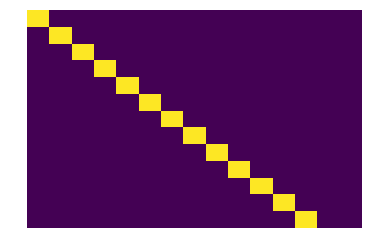

In [6]:
fig, ax = plt.subplots()
ax.imshow(sim.topics_by_index, aspect='auto')
ax.axis('off');

In [7]:
num_topics = sim.topics_by_index.shape[0]
count_cooccurrence = np.zeros((num_topics, num_topics))
node_indices = np.array([sim.docs_aux[i]['node_indices_by_word_slot'] for i in range(len(sim.docs_aux))])
for doc_index in range(node_indices.shape[0]):
    i = node_indices[doc_index, 0]
    j = node_indices[doc_index, 1]
    count_cooccurrence[i, j] += 1
coocurrence = count_cooccurrence / np.sum(count_cooccurrence, axis=(0,1))
niceprint(coocurrence)

[[0.1678 0.0278 0.0092 0.0095 0.0088 0.0280 0.0092 0.0094 0.0095 0.0272 0.0095 0.0093 0.0093]
 [0.0278 0.0226 0.0038 0.0037 0.0037 0.0164 0.0028 0.0029 0.0025 0.0158 0.0030 0.0030 0.0029]
 [0.0088 0.0035 0.0037 0.0019 0.0018 0.0028 0.0020 0.0019 0.0019 0.0023 0.0021 0.0016 0.0018]
 [0.0095 0.0039 0.0017 0.0038 0.0019 0.0028 0.0020 0.0018 0.0018 0.0029 0.0018 0.0016 0.0019]
 [0.0093 0.0035 0.0018 0.0017 0.0036 0.0028 0.0018 0.0015 0.0019 0.0026 0.0018 0.0019 0.0016]
 [0.0289 0.0161 0.0027 0.0029 0.0030 0.0221 0.0034 0.0041 0.0037 0.0167 0.0027 0.0026 0.0027]
 [0.0090 0.0026 0.0020 0.0018 0.0017 0.0037 0.0036 0.0018 0.0018 0.0029 0.0017 0.0020 0.0017]
 [0.0094 0.0028 0.0016 0.0021 0.0019 0.0034 0.0019 0.0036 0.0015 0.0028 0.0019 0.0020 0.0018]
 [0.0092 0.0027 0.0021 0.0017 0.0018 0.0037 0.0018 0.0019 0.0038 0.0029 0.0019 0.0019 0.0022]
 [0.0281 0.0166 0.0029 0.0028 0.0028 0.0164 0.0030 0.0026 0.0028 0.0223 0.0038 0.0041 0.0034]
 [0.0099 0.0024 0.0018 0.0020 0.0020 0.0026 0.0019 0.0016 0.

[[0.0000 0.0278 0.0092 0.0095 0.0088 0.0280 0.0092 0.0094 0.0095 0.0272 0.0095 0.0093 0.0093]
 [0.0278 0.0000 0.0038 0.0037 0.0037 0.0164 0.0028 0.0029 0.0025 0.0158 0.0030 0.0030 0.0029]
 [0.0088 0.0035 0.0000 0.0019 0.0018 0.0028 0.0020 0.0019 0.0019 0.0023 0.0021 0.0016 0.0018]
 [0.0095 0.0039 0.0017 0.0000 0.0019 0.0028 0.0020 0.0018 0.0018 0.0029 0.0018 0.0016 0.0019]
 [0.0093 0.0035 0.0018 0.0017 0.0000 0.0028 0.0018 0.0015 0.0019 0.0026 0.0018 0.0019 0.0016]
 [0.0289 0.0161 0.0027 0.0029 0.0030 0.0000 0.0034 0.0041 0.0037 0.0167 0.0027 0.0026 0.0027]
 [0.0090 0.0026 0.0020 0.0018 0.0017 0.0037 0.0000 0.0018 0.0018 0.0029 0.0017 0.0020 0.0017]
 [0.0094 0.0028 0.0016 0.0021 0.0019 0.0034 0.0019 0.0000 0.0015 0.0028 0.0019 0.0020 0.0018]
 [0.0092 0.0027 0.0021 0.0017 0.0018 0.0037 0.0018 0.0019 0.0000 0.0029 0.0019 0.0019 0.0022]
 [0.0281 0.0166 0.0029 0.0028 0.0028 0.0164 0.0030 0.0026 0.0028 0.0000 0.0038 0.0041 0.0034]
 [0.0099 0.0024 0.0018 0.0020 0.0020 0.0026 0.0019 0.0016 0.

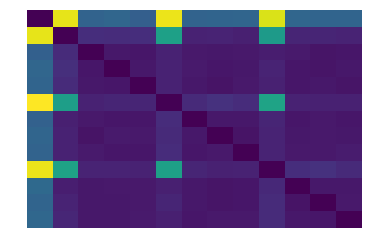

In [8]:
coocurrence_alt = coocurrence - np.diag(np.diag(coocurrence))
niceprint(coocurrence_alt)

fig, ax = plt.subplots()
ax.imshow(coocurrence_alt, aspect='auto')
ax.axis('off');

In [9]:
g = nx.Graph()
for i in range(num_topics):
    for j in range(num_topics):
        if i < j:
            # Note: use -coocurrence so that minimum_spanning_tree yields maximum spanning tree
            c = -0.5 * (coocurrence_alt[i, j] + coocurrence_alt[j, i])
            g.add_edge(i, j, weight = c)
tree = nx.algorithms.minimum_spanning_tree(g)
print("Maximum spanning tree:")
print(tree.edges())

Maximum spanning tree:
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12)]


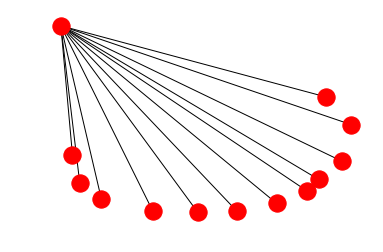

In [10]:
fig, ax = plt.subplots()
nx.draw(tree, pos=nx.spring_layout(tree, iterations=200), ax=ax)